# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
training_set = data.iloc[:, 1: 2].values

In [4]:
print(training_set)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [5]:
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Pre Processing

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
x_train = []
y_train = []
for i in range(60, 2035):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


# Model Building

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Metal device set to: Apple M1


2022-04-29 08:00:00.890732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-29 08:00:00.891036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-04-29 08:00:01.736053: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-29 08:00:03.851062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:00:04.239168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:00:04.606047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:00:04.721120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:00:04.803508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:00:05.168706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

 1/62 [..............................] - ETA: 4:25 - loss: 0.1513

2022-04-29 08:00:05.917771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 8s 63ms/step - loss: 0.0096
Epoch 2/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0022
Epoch 3/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0020
Epoch 4/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0018
Epoch 5/100
62/62 [==============================] - 3s 53ms/step - loss: 0.0014
Epoch 6/100
62/62 [==============================] - 3s 52ms/step - loss: 0.0018
Epoch 7/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0014
Epoch 8/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0012
Epoch 9/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0012
Epoch 10/100
62/62 [==============================] - 3s 52ms/step - loss: 0.0011
Epoch 11/100
62/62 [==============================] - 3s 52ms/step - loss: 0.0012
Epoch 12/100
62/62 [==============================] - 3s 53ms/step - loss: 9.2448e-04
Epoch 13/100
62/62 [=============

62/62 [==============================] - 3s 53ms/step - loss: 3.0646e-04
Epoch 98/100
62/62 [==============================] - 3s 53ms/step - loss: 3.2230e-04
Epoch 99/100
62/62 [==============================] - 3s 54ms/step - loss: 2.7058e-04
Epoch 100/100
62/62 [==============================] - 3s 53ms/step - loss: 2.7967e-04


# Comparing the Prediction using test

In [10]:
data_test = pd.read_csv('Sample_Stock_test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

# Test Data Pre Processing

In [11]:
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [12]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Test Data Prediction

In [13]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2022-04-29 08:05:36.366898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:05:36.486439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:05:36.561753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:05:36.647409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-29 08:05:36.723326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


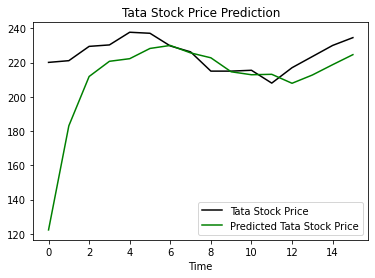

In [14]:
plt.plot(real_stock_price, color = 'black', label = 'Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()